In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
mobiles_data_info = pd.read_csv('final_mobile_data.csv')

In [3]:
#  mobiles_data_info.drop(mobiles_data_info.columns[8], axis=1, inplace=True)
mobiles_data_info.columns

Index(['Price_in_Rupees', 'Ram', 'Rom', 'Expandable_GB/TB', 'Screen_in_inch',
       'Secondary_Camera(MP)', 'Battery_details', 'Warranty(Year)', 'Rating',
       'Dual_sim_num'],
      dtype='object')

In [4]:
mobiles_data_info["Price_in_Rupees"].value_counts()

7999     42
8999     36
10999    27
7990     25
9999     23
         ..
8749      1
5699      1
9800      1
11849     1
11275     1
Name: Price_in_Rupees, Length: 154, dtype: int64

In [5]:
column_names = mobiles_data_info.columns.tolist()
column_names

['Price_in_Rupees',
 'Ram',
 'Rom',
 'Expandable_GB/TB',
 'Screen_in_inch',
 'Secondary_Camera(MP)',
 'Battery_details',
 'Warranty(Year)',
 'Rating',
 'Dual_sim_num']

In [6]:
mobiles_data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
Price_in_Rupees         696 non-null int64
Ram                     696 non-null int64
Rom                     696 non-null int64
Expandable_GB/TB        696 non-null int64
Screen_in_inch          696 non-null float64
Secondary_Camera(MP)    696 non-null int64
Battery_details         696 non-null int64
Warranty(Year)          696 non-null int64
Rating                  696 non-null float64
Dual_sim_num            696 non-null int64
dtypes: float64(2), int64(8)
memory usage: 54.5 KB


In [7]:
mobiles_data_info.describe()

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.0,696.000000,696.0
mean,12890.630747,4.172414,49.719828,215.202586,5.822284,10.847701,3517.564655,1.0,4.274425,1.0
std,9477.931826,5.457924,35.397158,112.435679,0.572944,7.139500,748.647891,0.0,0.266133,0.0
min,599.000000,1.000000,4.000000,2.000000,1.800000,0.000000,850.000000,1.0,3.000000,1.0
25%,6999.000000,2.000000,32.000000,128.000000,5.450000,5.000000,3000.000000,1.0,4.100000,1.0
50%,9799.000000,3.000000,32.000000,256.000000,6.000000,8.000000,3500.000000,1.0,4.350000,1.0
75%,15490.000000,4.000000,64.000000,256.000000,6.270000,16.000000,4000.000000,1.0,4.400000,1.0
max,59999.000000,64.000000,256.000000,512.000000,6.700000,48.000000,5100.000000,1.0,5.000000,1.0


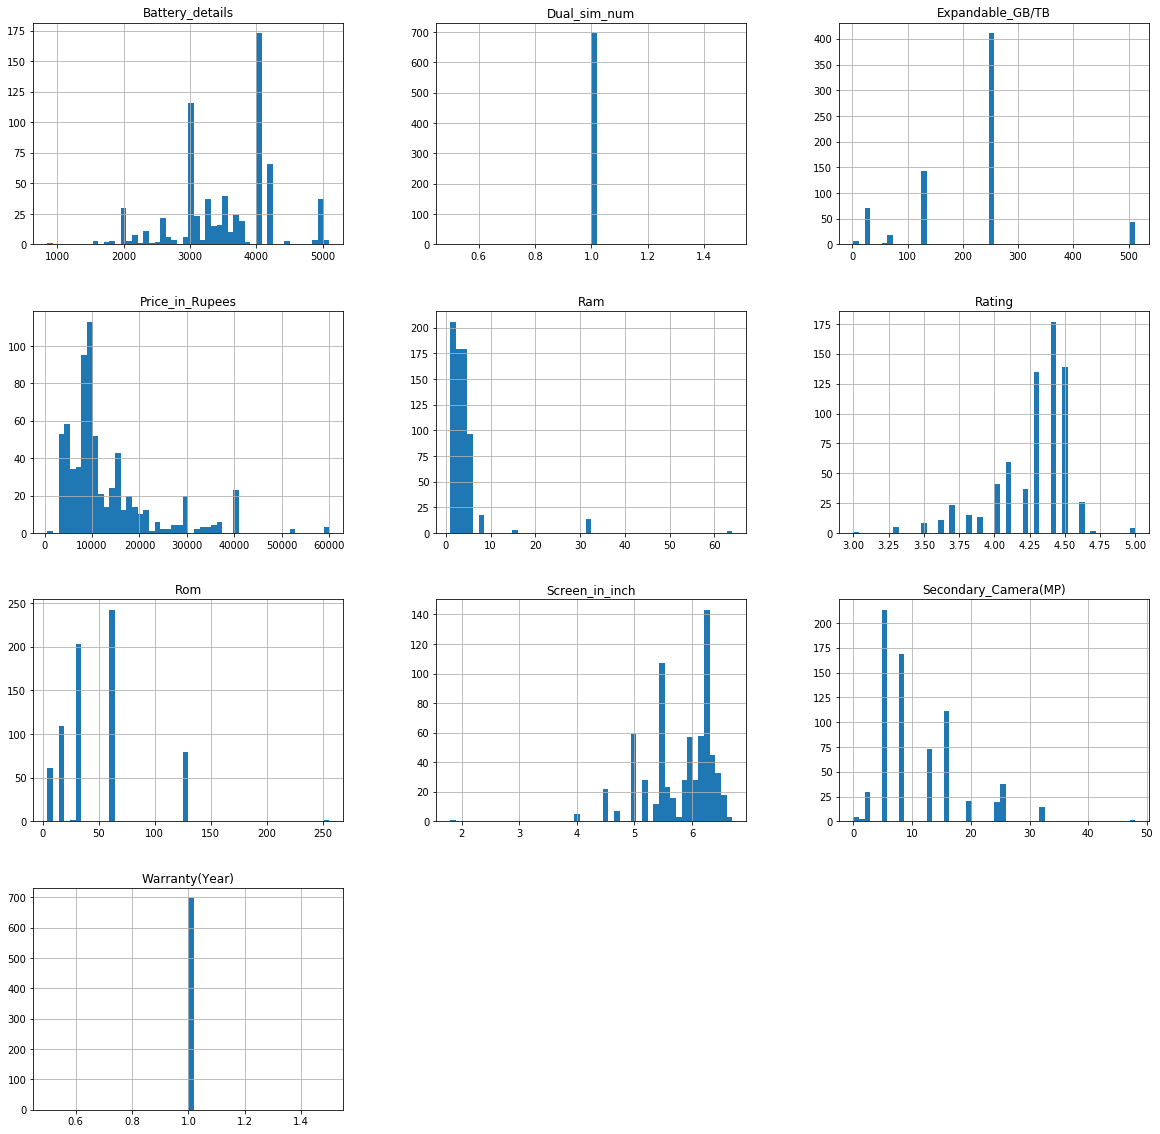

In [8]:
mobiles_data_info.hist(bins=50, figsize=(20, 20))
plt.show()

In [9]:
mobiles_data_info.tail()

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
691,39999,3,32,128,5.2,8,3000,1,4.5,1
692,39999,3,32,128,5.2,8,3000,1,4.5,1
693,29990,8,128,256,6.4,25,3700,1,4.4,1
694,36990,6,64,256,6.3,8,3300,1,4.6,1
695,36990,6,64,256,6.3,8,3300,1,4.6,1


In [10]:
mobiles_data_info.columns

Index(['Price_in_Rupees', 'Ram', 'Rom', 'Expandable_GB/TB', 'Screen_in_inch',
       'Secondary_Camera(MP)', 'Battery_details', 'Warranty(Year)', 'Rating',
       'Dual_sim_num'],
      dtype='object')

In [11]:
x = mobiles_data_info[['Ram','Rom','Expandable_GB/TB','Screen_in_inch',
                       'Secondary_Camera(MP)','Battery_details','Warranty(Year)','Rating','Dual_sim_num']].values
y = mobiles_data_info.Price_in_Rupees.values

In [12]:
# mobiles_data_info.drop(mobiles_data_info.columns[0], axis=1, inplace=True)

In [13]:
mobiles_data_info.head()

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
0,5999,2,16,256,6.1,5,4000,1,4.5,1
1,5999,2,16,256,6.1,5,4000,1,4.5,1
2,8990,3,64,256,5.5,8,3300,1,4.3,1
3,10000,2,16,128,5.0,5,2630,1,4.2,1
4,10000,3,16,256,5.2,5,3000,1,4.2,1


In [14]:
mobiles_data_info.isnull().any()

Price_in_Rupees         False
Ram                     False
Rom                     False
Expandable_GB/TB        False
Screen_in_inch          False
Secondary_Camera(MP)    False
Battery_details         False
Warranty(Year)          False
Rating                  False
Dual_sim_num            False
dtype: bool

In [15]:
mobiles_data_info.head(10)

,Price_in_Rupees,Ram,Rom,Expandable_GB/TB,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year),Rating,Dual_sim_num
0,5999,2,16,256,6.1,5,4000,1,4.5,1
1,5999,2,16,256,6.1,5,4000,1,4.5,1
2,8990,3,64,256,5.5,8,3300,1,4.3,1
3,10000,2,16,128,5.0,5,2630,1,4.2,1
4,10000,3,16,256,5.2,5,3000,1,4.2,1
5,9800,3,16,256,5.2,5,3000,1,4.2,1
6,9799,3,16,256,5.2,5,3000,1,4.4,1
7,10000,1,16,32,5.0,5,2420,1,3.8,1
8,7990,2,32,256,6.1,5,4000,1,4.4,1
9,10990,4,64,256,6.2,8,4230,1,4.3,1


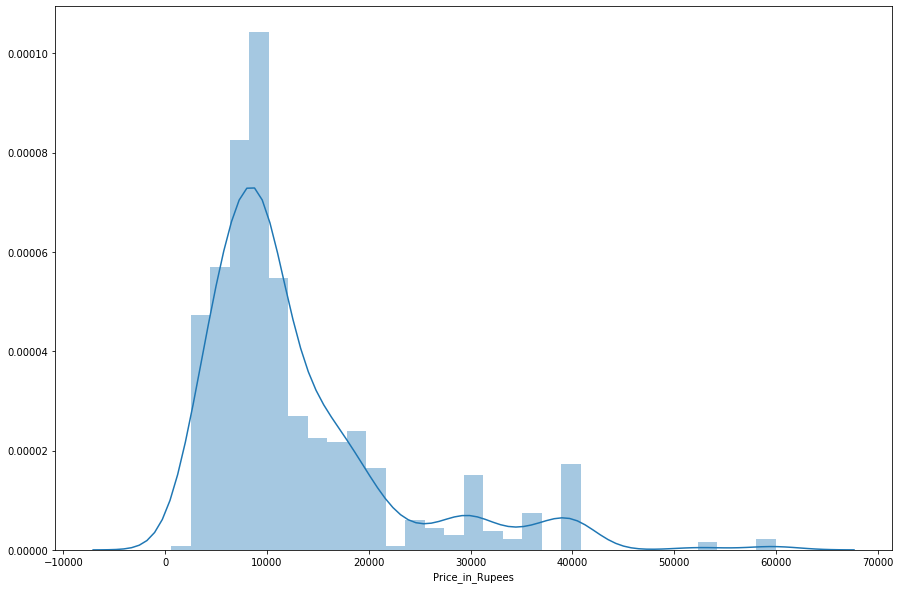

In [16]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(mobiles_data_info['Price_in_Rupees'])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(x,y ,test_size=0.2,random_state=2)

In [19]:
X_train.shape

(556, 9)

In [20]:
X_test.shape

(140, 9)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr_model = LinearRegression()

In [23]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
prediction=lr_model.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

In [26]:
df1=df.head(31)

In [27]:
df1.head(31)

,Actual,Predicted
0,11990,13371.763084
1,4499,4460.141940
2,16999,25444.280831
3,4499,7033.572695
4,10490,16586.550376
5,7999,8677.852515
6,6799,10868.850848
7,14990,16446.135722
8,7990,9243.844037
9,7990,8385.917406


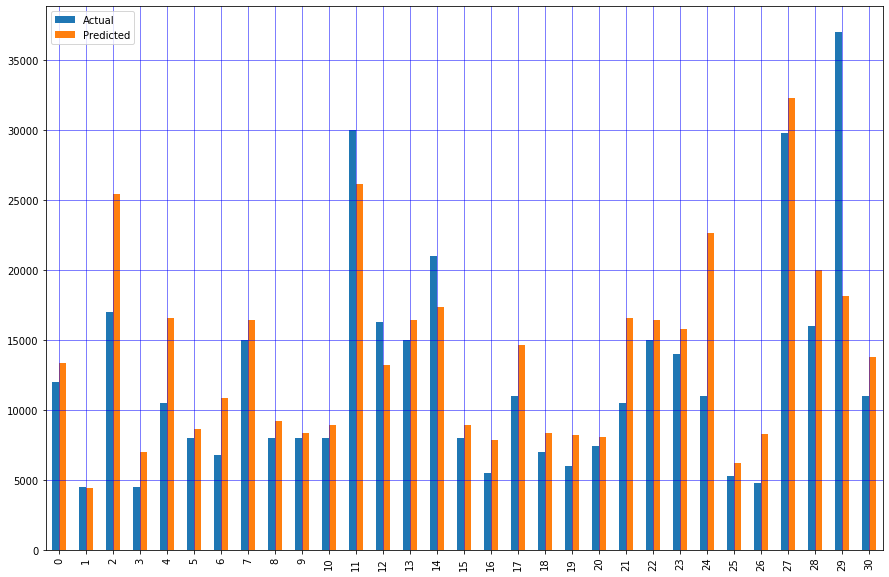

In [28]:
df1.plot(kind='bar',figsize=(15,10))
plt.grid(linewidth='0.5', color='green')
plt.grid(linewidth='0.5', color='blue')
plt.show()

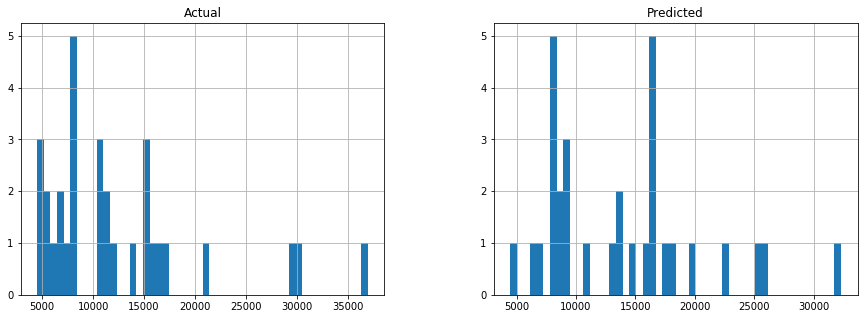

In [29]:
df1.hist(bins=50, figsize=(15, 5))
plt.show()

In [30]:
prediction.shape

(140,)

In [31]:
y_test.shape

(140,)

In [32]:
print("Train result:", lr_model.score(X_train, y_train))
print("Test result:", lr_model.score(X_test, y_test))

Train result: 0.5394231933336981
Test result: 0.6296486710527542


In [33]:
accuracy = lr_model.score(X_test,y_test)
print(accuracy*100,'%')

62.964867105275424 %


In [34]:
from sklearn import metrics

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) 

Mean Absolute Error: 3695.491255744947
Mean Squared Error: 29035534.860767584
Root Mean Squared Error: 5388.463126046942


In [36]:
metrics.r2_score(y_test,prediction)

0.6296486710527542

In [37]:
X_test.shape

(140, 9)

In [38]:
y_test.shape

(140,)

In [39]:
# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, prediction, color='red', linewidth=2)
# plt.show()

In [40]:
# from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# mobiles_data_info["Secondary_Camera(MP)_code"] = lb_make.fit_transform(mobiles_data_info["Secondary_Camera(MP)"])
# mobiles_data_info[["Secondary_Camera(MP)", "Secondary_Camera(MP)_code"]].head(1)

In [986]:
# mobiles_data_info.head(20)

In [982]:
mob=pd.get_dummies(mobiles_data_info, columns=["Price_in_Rupees"])

In [974]:
# mob.to_csv('one_hot_encoding.csv',index=False)

In [987]:
# mob.head(29)